In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Persiapan Data

In [3]:
#Read train dataset
dataset_train = pd.read_csv('/content/drive/MyDrive/Tubes_ML/kendaraan_train.csv')

#Drop kolom "Tertarik"
dataset_train.drop('Tertarik', axis=1, inplace=True)

dataset_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


# Eksplorasi Data

In [4]:
#Ukuran dataset
dataset_train.shape

(285831, 11)

In [5]:
#Cek data duplikat
dataset_train.duplicated().sum()

0

In [6]:
#Menampilkan tipe data dari dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [7]:
#Menampilkan jumlah data null
dataset_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [8]:
#Mengatasi missing value
#Data numerik diisi dengan mean dari datanya
dataset_train['id'] = dataset_train['id'].fillna((dataset_train['id'].mean()))
dataset_train['Umur'] = dataset_train['Umur'].fillna((dataset_train['Umur'].mean()))
dataset_train['SIM'] = dataset_train['SIM'].fillna((dataset_train['SIM'].mean()))
dataset_train['Kode_Daerah'] = dataset_train['Kode_Daerah'].fillna((dataset_train['Kode_Daerah'].mean()))
dataset_train['Sudah_Asuransi'] = dataset_train['Sudah_Asuransi'].fillna((dataset_train['Sudah_Asuransi'].mean()))
dataset_train['Premi'] = dataset_train['Premi'].fillna((dataset_train['Premi'].mean()))
dataset_train['Kanal_Penjualan'] = dataset_train['Kanal_Penjualan'].fillna((dataset_train['Kanal_Penjualan'].mean()))
dataset_train['Lama_Berlangganan'] = dataset_train['Lama_Berlangganan'].fillna((dataset_train['Lama_Berlangganan'].mean()))

#Data kategorikal diisi dengan mode dari datanya
fill_jenis_kelamin = dataset_train['Jenis_Kelamin'].mode()
dataset_train['Jenis_Kelamin'].fillna(fill_jenis_kelamin[0], inplace=True)

fill_umur_kendaraan = dataset_train['Umur_Kendaraan'].mode()
dataset_train['Umur_Kendaraan'].fillna(fill_umur_kendaraan[0], inplace=True)

fill_kendaraan_rusak = dataset_train['Kendaraan_Rusak'].mode()
dataset_train['Kendaraan_Rusak'].fillna(fill_kendaraan_rusak[0], inplace=True)

In [9]:
#Cek data null
dataset_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [10]:
#Ubah kategorik menjadi numerik
#Kolom "Jenis_Kelamin" -> Wanita = 0, Pria = 1
dataset_train['Jenis_Kelamin'].replace({
    'Wanita':0,
    'Pria':1
}, inplace = True)

In [11]:
#Ubah kategorik menjadi numerik
#Kolom "Kendaraan_Rusak" -> Tidak = 0, Pernah = 1
dataset_train['Kendaraan_Rusak'].replace({
    'Tidak':0,
    'Pernah':1
}, inplace = True)

In [12]:
#Ubah kategorik menjadi numerik
#Kolom "Umur_Kendaraan" -> <1 Tahun = 0, 1-2 Tahun = 1, >2 Tahun = 2 
dataset_train['Umur_Kendaraan'].replace({
    '< 1 Tahun':0,
    '1-2 Tahun':1,
    '> 2 Tahun':2
}, inplace = True)

In [13]:
#Cek dataset
dataset_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
2,3,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0
3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
4,5,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0
285827,285828,0,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0
285828,285829,0,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0
285829,285830,1,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0


In [14]:
#Cek tipe data
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      285831 non-null  int64  
 2   Umur               285831 non-null  float64
 3   SIM                285831 non-null  float64
 4   Kode_Daerah        285831 non-null  float64
 5   Sudah_Asuransi     285831 non-null  float64
 6   Umur_Kendaraan     285831 non-null  int64  
 7   Kendaraan_Rusak    285831 non-null  int64  
 8   Premi              285831 non-null  float64
 9   Kanal_Penjualan    285831 non-null  float64
 10  Lama_Berlangganan  285831 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 24.0 MB


In [15]:
#Normalisasi data
def scaler(dataset_train):
  return (dataset_train - dataset_train.min())/(dataset_train.max() - dataset_train.min())

In [16]:
data_train = scaler(dataset_train)
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.000000,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038
1,0.000003,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111
2,0.000007,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163
3,0.000010,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391
4,0.000014,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.999986,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263
285827,0.999990,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408
285828,0.999993,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405
285829,0.999997,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654


In [17]:
data_train.corr()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
id,1.000000,-0.001226,0.001686,-0.002590,0.002060,-0.002966,0.002682,0.002087,0.002233,-0.001462,0.000890
Jenis_Kelamin,-0.001226,1.000000,0.135939,-0.015916,0.001444,-0.075725,0.149022,0.082619,0.004290,-0.106507,-0.001275
Umur,0.001686,0.135939,1.000000,-0.075216,0.041433,-0.242319,0.719478,0.249291,0.061275,-0.548758,0.000140
SIM,-0.002590,-0.015916,-0.075216,1.000000,-0.003183,0.015200,-0.034423,-0.016425,-0.010708,0.041165,-0.001203
Kode_Daerah,0.002060,0.001444,0.041433,-0.003183,1.000000,-0.023296,0.040836,0.026338,-0.011278,-0.041044,-0.003460
Sudah_Asuransi,-0.002966,-0.075725,-0.242319,0.015200,-0.023296,1.000000,-0.356711,-0.765342,0.005609,0.210739,0.002621
Umur_Kendaraan,0.002682,0.149022,0.719478,-0.034423,0.040836,-0.356711,1.000000,0.364302,0.035771,-0.516375,-0.002208
Kendaraan_Rusak,0.002087,0.082619,0.249291,-0.016425,0.026338,-0.765342,0.364302,1.000000,0.007769,-0.210145,-0.001250
Premi,0.002233,0.004290,0.061275,-0.010708,-0.011278,0.005609,0.035771,0.007769,1.000000,-0.106468,-0.000710
Kanal_Penjualan,-0.001462,-0.106507,-0.548758,0.041165,-0.041044,0.210739,-0.516375,-0.210145,-0.106468,1.000000,0.000311


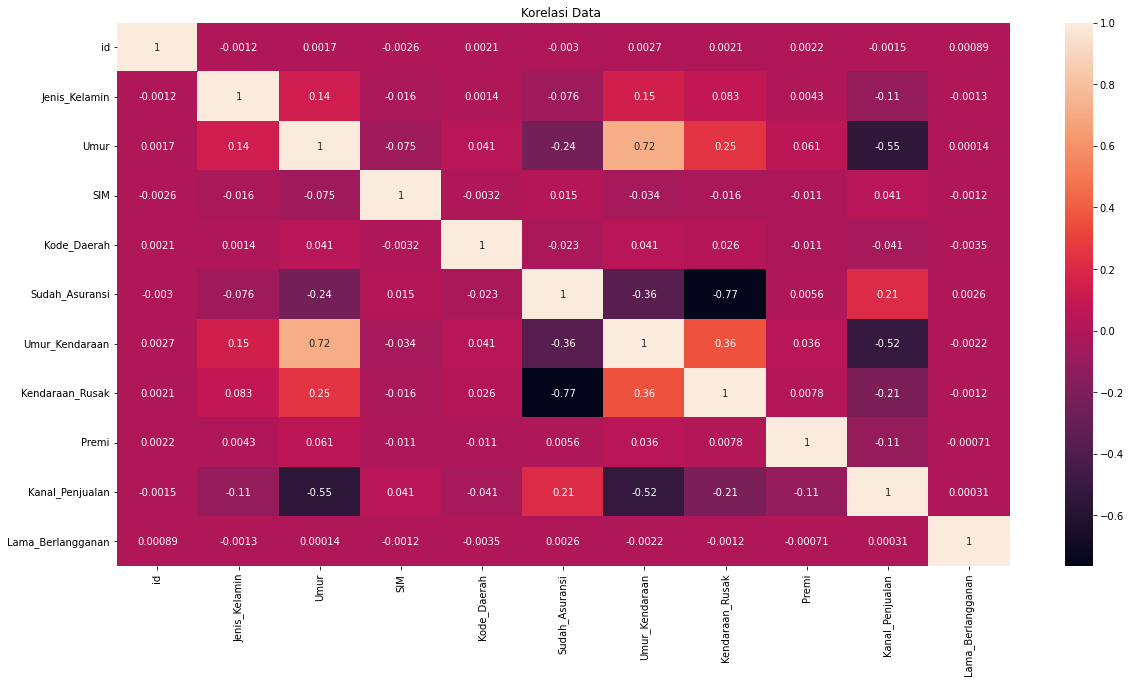

In [18]:
#Heatmap korelasi data
data_corelation = data_train.corr()
fig, ax = plt.subplots(figsize=(20,10))
sb.heatmap(data_corelation, annot=True)

plt.title("Korelasi Data ")
plt.show()

# Pemodelan

In [19]:
model = data_train[["Umur", "Kode_Daerah"]]
model

,Umur,Kode_Daerah
0,0.153846,0.634615
1,0.430769,0.750000
2,0.015385,0.884615
3,0.584615,0.923077
4,0.461538,0.673077
...,...,...
285826,0.046154,0.076923
285827,0.015385,0.884615
285828,0.046154,0.961538
285829,0.738462,0.134615


Text(0.5, 0, 'Umur')

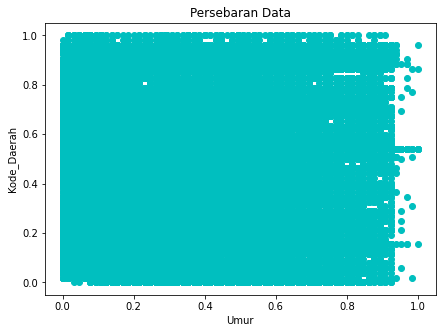

In [20]:
#Persebaran data
fig = plt.figure(figsize=(7,5))
plt.title("Persebaran Data")
plt.scatter(model["Umur"], model["Kode_Daerah"], c = "c")
plt.ylabel('Kode_Daerah')
plt.xlabel('Umur')

In [21]:
#Menghitung euclidean distance
py.random.seed(42)

def euclidean_distance(x1, x2):
    return py.sqrt(py.sum((x1 - x2) ** 2))

In [22]:
#KMeans
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # indeks sampel setiap klaster
        self.clusters = [[] for _ in range(self.K)]
        # centroid setiap klaster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # inisialisasi centroids
        random_sample_idxs = py.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimasi klaster
        for _ in range(self.max_iters):
            # Assign sampel ke centroids terdekat (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Menghitung centroid baru dari klaster
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # Memeriksa apakah centroid sudah berubah
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Mengklasifikasikan sampel sebagai index klasternya masing-masing
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # Label sampel berdasarkan assignment
        labels = py.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Buat klaster baru dengan assign samples ke centroids terdekat
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # jarak current sample ke setiap centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = py.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value dari klaster ke centroid
        centroids = py.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = py.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # Jarak antara centroid lama dan baru
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

# Eksperimen

In [23]:
kluster = model.to_numpy()

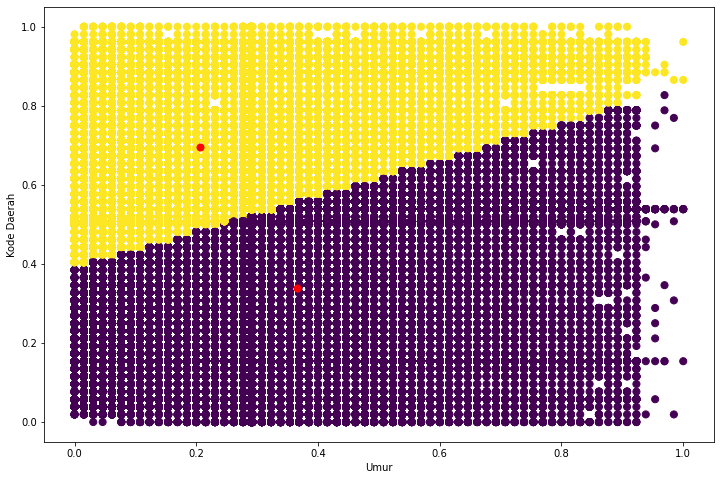

In [24]:
model1 = KMeans(K=2, max_iters=10)
prediksi = model1.predict(kluster)

plt.figure(figsize=(12,8))
plt.scatter(kluster[:,0], kluster[:,1], c=prediksi, s=50)

centroid = model1.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='o', linewidths=2)
plt.xlabel('Umur')
plt.ylabel('Kode Daerah')
plt.show()

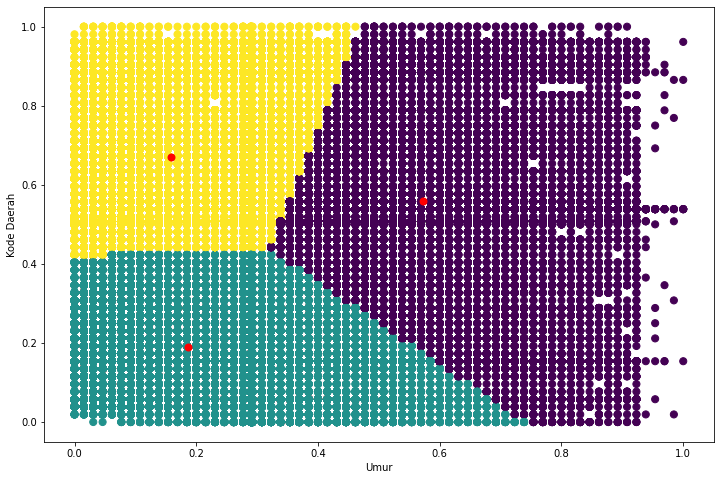

In [25]:
model2 = KMeans(K=3, max_iters=10)
prediksi = model2.predict(kluster)

plt.figure(figsize=(12,8))
plt.scatter(kluster[:,0], kluster[:,1], c=prediksi, s=50)

centroid = model2.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='o', linewidths=2)
plt.xlabel('Umur')
plt.ylabel('Kode Daerah')
plt.show()

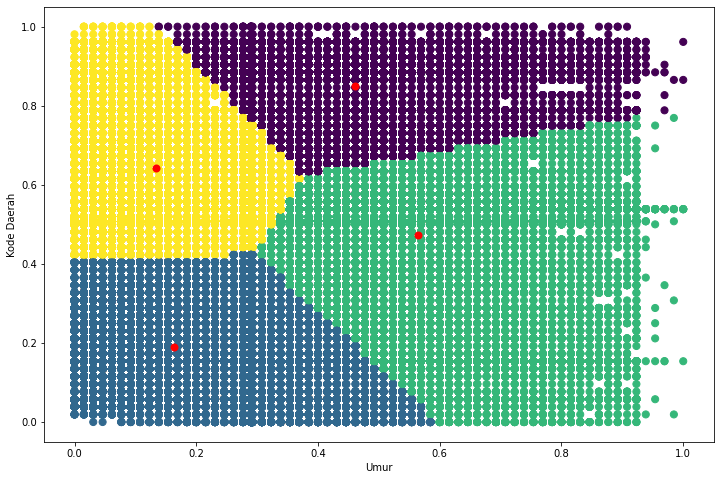

In [26]:
model3 = KMeans(K=4, max_iters=10)
prediksi = model3.predict(kluster)

plt.figure(figsize=(12,8))
plt.scatter(kluster[:,0], kluster[:,1], c=prediksi, s=50)

centroid = model3.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='o', linewidths=2)
plt.xlabel('Umur')
plt.ylabel('Kode Daerah')
plt.show()

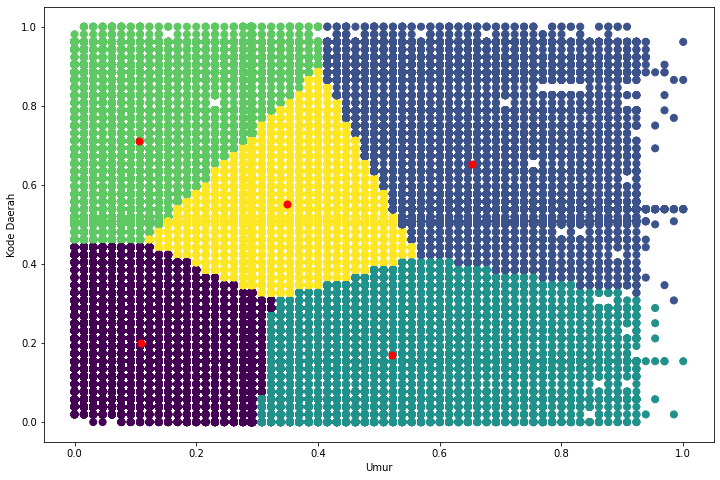

In [27]:
model4 = KMeans(K=5, max_iters=10)
prediksi = model4.predict(kluster)

plt.figure(figsize=(12,8))
plt.scatter(kluster[:,0], kluster[:,1], c=prediksi, s=50)

centroid = model4.centroids
plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='o', linewidths=2)
plt.xlabel('Umur')
plt.ylabel('Kode Daerah')
plt.show()

# Evaluasi

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [29]:
#Elbow Method
distortions = []
elbow_dist = {}
K = range(1, 10)

for k in K:
	# Membuat dan menyocokkan model
	kmeanModel = KMeans(n_clusters=k).fit(model)
	kmeanModel.fit(model)

	distortions.append(sum(py.min(cdist(model, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / data_train.shape[0])

	elbow_dist[k] = sum(py.min(cdist(model, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / data_train.shape[0]

In [30]:
for key, val in elbow_dist.items():
  print(f'{key} : {val}')

1 : 0.3054410697952831
2 : 0.24083864349561432
3 : 0.18566370035370847
4 : 0.1602451398765831
5 : 0.14213038026506272
6 : 0.119371344245931
7 : 0.10489560701841921
8 : 0.09745457489228673
9 : 0.09193763447499677


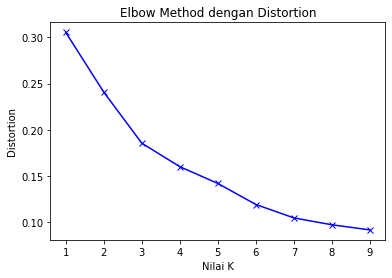

In [31]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Elbow Method dengan Distortion')
plt.show()